<a href="https://colab.research.google.com/github/SilvanaJ90/Silvana-Jaramillo_efRouting/blob/Silvana/Copia_de_Prueba_T%C3%A9cnica_efRouting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba Técnica efRouting: Analista de Datos**
Abril 2025

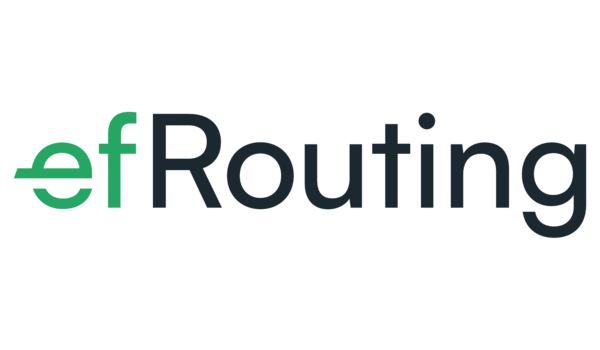

## **Parte A: Indicadores en eltiempo**

**Entendimiento de la prueba Parte A**


En la industria logística, existen diversos indicadores de gestión operativa y analítica que permiten medir y evaluar diferentes aspectos del negocio, tales como eficiencia, cumplimiento, costos y tiempos de entrega. A continuación, se presentan 5 indicadores logísticos comúnmente utilizados en la industria, junto a una breve descripción:

*   **OTIF (%): On Time In Full.** Mide el porcentaje de entregas que fueron
realizadas a tiempo y en su totalidad, respecto al total comprometido. Es un
indicador clave de desempeño operativo y satisfacción del cliente.
*   **Lead Time promedio (días):**Tiempo promedio que transcurre desde que se
realiza un pedido hasta que se concreta la entrega. Es un reflejo de la
eficiencia del proceso logístico.
*   **Tasa de cumplimiento de entregas (%):** Porcentaje de entregas realizadas
efectivamente respecto al total planificado. Evalúa la confiabilidad de la
operación.
*   **Costo logístico por entrega (USD):** Gasto promedio incurrido en cada entrega,
incluyendo transporte, almacenamiento, personal y otros costos asociados.
*   **Número de entregas:**Cantidad total de entregas realizadas en el período.
Permite dimensionar la carga operativa y su evolución a lo largo del tiempo.

**Comprensión de los datos**

Se dispone de unos datos de panel de distintos indicadores a través del tiempo en este enlace: [data_panel_logistic](https://github.com/jcastillo-efr/data_public/blob/main/panel_indicadores_logisticos.csv#L4)

In [2]:
# Installing dependencies
!pip install scikit-learn


In [3]:
# Standard Python libraries
import random

# Third-party libraries: data analysis and manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions
from scipy.stats import gaussian_kde

# Geospatial libraries
import folium

# Machine Learning libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [4]:
# Data exploration
url = "https://raw.githubusercontent.com/jcastillo-efr/data_public/main/panel_indicadores_logisticos.csv"
df = pd.read_csv(url, sep=',')
df.head()

,fecha,otif,lead_time,cumplimiento,costo_entrega,entregas
0,2023-01-01,96.0,4.7,92.5,7.93,1510
1,2023-02-01,94.7,5.1,94.9,9.00,1597
2,2023-03-01,96.3,4.4,91.3,8.36,1430
3,2023-04-01,98.0,5.2,97.2,7.35,1467
4,2023-05-01,94.5,4.7,90.7,8.36,1461


In [22]:
# Convert data to DataFrame
df = pd.DataFrame(df)
df.head(23)

,fecha,otif,lead_time,cumplimiento,costo_entrega,entregas
0,2023-01-01,96.0,4.7,92.5,7.93,1510
1,2023-02-01,94.7,5.1,94.9,9.00,1597
2,2023-03-01,96.3,4.4,91.3,8.36,1430
3,2023-04-01,98.0,5.2,97.2,7.35,1467
4,2023-05-01,94.5,4.7,90.7,8.36,1461
5,2023-06-01,94.5,4.9,98.9,9.54,1354
6,2023-07-01,98.2,4.7,97.0,7.96,1530
7,2023-08-01,96.5,5.9,91.8,9.56,1526
8,2023-09-01,94.1,5.0,90.0,5.38,1501
9,2023-10-01,96.1,4.5,97.3,8.82,1477


In [6]:
# Data description
df.describe()

,otif,lead_time,cumplimiento,costo_entrega,entregas
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,94.708333,4.866667,94.225000,8.048750,1494.208333
std,1.931189,0.442981,2.784468,1.001752,94.440218
min,91.200000,4.000000,90.000000,5.380000,1308.000000
25%,93.725000,4.575000,91.675000,7.495000,1460.250000
50%,94.500000,4.850000,94.050000,8.090000,1495.000000
75%,96.025000,5.100000,96.675000,8.587500,1526.000000
max,98.200000,5.900000,98.900000,9.560000,1746.000000


In [7]:
# Columns
df.columns

Index(['fecha', 'otif', 'lead_time', 'cumplimiento', 'costo_entrega',
       'entregas'],
      dtype='object')

In [8]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fecha          24 non-null     object 
 1   otif           24 non-null     float64
 2   lead_time      24 non-null     float64
 3   cumplimiento   24 non-null     float64
 4   costo_entrega  24 non-null     float64
 5   entregas       24 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ KB


In [9]:
# Data size
df.shape

(24, 6)

In [10]:
# Data processing

df['fecha'] = pd.to_datetime(df['fecha'])
print(df.head())

       fecha  otif  lead_time  cumplimiento  costo_entrega  entregas
0 2023-01-01  96.0        4.7          92.5           7.93      1510
1 2023-02-01  94.7        5.1          94.9           9.00      1597
2 2023-03-01  96.3        4.4          91.3           8.36      1430
3 2023-04-01  98.0        5.2          97.2           7.35      1467
4 2023-05-01  94.5        4.7          90.7           8.36      1461


### **A.1)** Calcular, para cada uno, la diferencia relativa porcentual mes a mes y comente sobre los resultados que obtiene.

In [11]:
# Calculate RPD (Rate of Percentage Difference)


def calculate_rpd(df):
    """
    Calculates the Rate of Percentage Difference (RPD) for the numeric columns in the given DataFrame.

    Parameters:
    - df: The input DataFrame that contains numeric columns and a 'date' column.

    Returns:
    - A DataFrame with the RPD of the numeric columns, joined with the 'date' column.
    """
    # Select numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Calculate RPD
    df_rpd = df[numeric_columns].pct_change() * 100
    df_rpd = df_rpd.round(2)

    # Add the 'date' column
    df_rpd = df[['fecha']].join(df_rpd)

    # Return the RPD DataFrame
    return df_rpd

# Execute the function
df_rpd = calculate_rpd(df)
print(df_rpd)


        fecha  otif  lead_time  cumplimiento  costo_entrega  entregas
0  2023-01-01   NaN        NaN           NaN            NaN       NaN
1  2023-02-01 -1.35       8.51          2.59          13.49      5.76
2  2023-03-01  1.69     -13.73         -3.79          -7.11    -10.46
3  2023-04-01  1.77      18.18          6.46         -12.08      2.59
4  2023-05-01 -3.57      -9.62         -6.69          13.74     -0.41
5  2023-06-01  0.00       4.26          9.04          14.11     -7.32
6  2023-07-01  3.92      -4.08         -1.92         -16.56     13.00
7  2023-08-01 -1.73      25.53         -5.36          20.10     -0.26
8  2023-09-01 -2.49     -15.25         -1.96         -43.72     -1.64
9  2023-10-01  2.13     -10.00          8.11          63.94     -1.60
10 2023-11-01 -2.08      20.00         -0.92          -8.28     -8.06
11 2023-12-01  0.00     -18.52          0.21          -4.82      7.36
12 2024-01-01  1.49      15.91          0.31           5.06      0.55
13 2024-02-01 -4.50 

**Observaciones sobre la diferencia de RPD:**

Tendencias generales:


* **otif** muestra fluctuaciones significativas, con cambios tanto positivos como negativos. Por ejemplo, en marzo de 2023, tuvo un aumento del 1.69%, seguido de una caída del 3.57% en mayo de 2023, con picos más bajos y altos a lo largo del año.

* **lead_time** muestra también mucha variabilidad, con fluctuaciones más notables en los primeros meses (por ejemplo, -13.73% en marzo de 2023) y aumentando en meses posteriores (como el 25.53% en agosto de 2023), lo que indica una evolución irregular en el tiempo.

* **cumplimiento** tiene cambios tanto negativos como positivos, pero con mayor tendencia a variaciones pequeñas a lo largo del tiempo, en los meses de julio a octubre de 2023 en tendencia negativa, y en junio al mes de agosto de 2023 seguido la tendencia negativa


* **costo_entrega** presenta fluctuaciones bastante marcadas, especialmente a partir de agosto de 2023, donde se observan incrementos significativos, como el 63.94% en octubre de 2023 y el 29.45% en marzo de 2024.

* **entregas** muestra una tendencia a tener más variaciones a lo largo del tiempo, especialmente en los primeros meses y algunos picos negativos, como en junio de 2024 (-10.18%).

**Comportamiento de las variables:**

Algunas variables, como otif, fluctua significativamente mes a mes,se deben investigar que factores influyen en el desempeño de las entregas a tiempo y en su totalidad

lead_time parece tener un comportamiento volátil con subidas y bajadas pronunciadas. En particular, los valores negativos más pronunciados en algunos meses reflejan una posible mejora en los tiempos de entrega, mientras que los picos positivos podrían indicar un aumento de esos tiempos.

costo_entrega es una variable que parece tener picos altos en ciertos meses, lo que podría estar relacionado con cambios en costos logísticos o situaciones excepcionales.

Las entregas y cumplimiento siguen una tendencia más estable, pero con algunas oscilaciones hacia el final de 2023 y principios de 2024, lo que podría reflejar ajustes estacionales o cambios en la operación.

**Eventos notables:**

En el mes de octubre de 2023, por ejemplo, el costo_entrega aumentó un 63.94%, lo que podría ser un indicador de un evento excepcional, como un aumento en los costos de los insumos, cambio de proveedores, o una política de precios nueva.

entregas muestra una caída significativa en marzo de 2023, junio de 2024, septiembre de 2024, lo que podría indicar un descenso en la cantidad de entregas realizadas.

**Conclusiones posibles:**
Estacionalidad o tendencias de negocio: Se pueden observar tendencias cíclicas, como los picos en el costo_entrega y lead_time en ciertos meses, lo que puede estar relacionado con fluctuaciones estacionales de la demanda o cambios operativos internos.

Impacto de decisiones o eventos: Algunos picos y valles en las variables indican que probablemente hay eventos o decisiones que impactaron significativamente en esos meses. Por ejemplo, un incremento de costos podría estar relacionado con cambios de precios o ajustes de tarifas, mientras que cambios en los tiempos de entrega (lead_time) podrían reflejar mejoras o problemas operativos.

Estabilidad relativa: Algunas variables son relativamente estables en comparación con otras, como cumplimiento y entregas, mientras que otras, como costos de entrega y lead_time, son más volátiles

### **A.2)** Graficar las series de tiempo individuales y plantear una visualización de las diferencias relativas

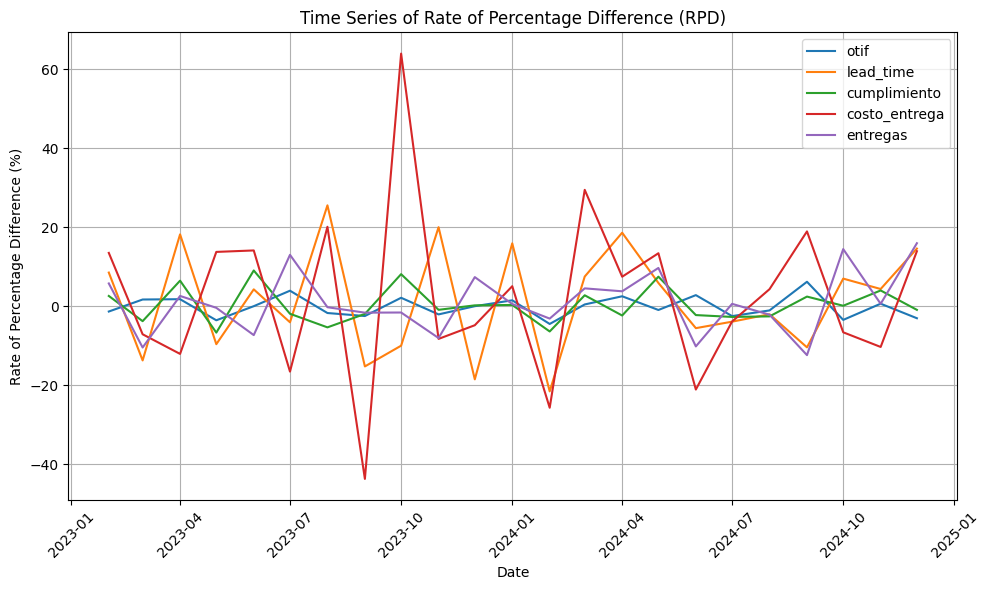

In [12]:
# Function to plot time series of RPD
def plot_rpd(df_rpd):
    """
    Plots the time series of the Rate of Percentage Difference (RPD) for each numeric column.

    Parameters:
    - df_rpd: DataFrame containing the RPD values with the 'date' column.
    """

    # Set the 'fecha' column as the index
    df_rpd.set_index('fecha', inplace=True)

    # Plot each numeric column as a separate line
    plt.figure(figsize=(10, 6))

    for column in df_rpd.columns:
        plt.plot(df_rpd.index, df_rpd[column], label=column)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Rate of Percentage Difference (%)')
    plt.title('Time Series of Rate of Percentage Difference (RPD)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Execute the function
df_rpd = calculate_rpd(df)

# Call the function
plot_rpd(df_rpd)


### **A.3)** ¿Es posible predecir el comportamiento en el próximo mes o año de cada uno de los indicadores? argumente

Si, se puede predecir, ya que los indicadores analizados son series temporales, es decir valores que evolucionan con el tiempo se pueden usar modelos o algoritmos para identificar este tipo de patrones como LSTM

### **A.4)** Diseñe e implemente un sistema de monitoreo de estos indicadores y una posible alerta que se emita el próximo mes al último mes del panel.¿Cómo mantendría en producción este sistema?

## **Parte B: densidad de cargas en el espacio**

### **B.1)** Investigar las coordenadas GPS de al menos 25.000 ciudades reales en Estados Unidos. Disponer de esos datos para los análisis que vienen. Go efficient, happy, and green.

In [21]:
# Data exploration
df_us = pd.read_excel("/content/drive/MyDrive/Dataset/uscities.xlsx")
df_us.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18832416,10943.7,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11885717,3165.8,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8489066,4590.3,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6113982,4791.1,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,6046392,1386.5,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [23]:
# Convert data to DataFrame
df_us = pd.DataFrame(df_us)
df_us.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18832416,10943.7,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11885717,3165.8,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8489066,4590.3,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6113982,4791.1,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,6046392,1386.5,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [24]:
# Data description
df_us.describe()

,county_fips,lat,lng,population,density,ranking,id
count,31254.000000,31254.000000,31254.000000,3.125400e+04,31254.000000,31254.000000,3.125400e+04
mean,29960.619121,38.629765,-92.799420,1.287201e+04,465.459157,2.993729,1.838135e+09
std,15819.715936,5.845466,15.650594,1.791285e+05,724.851629,0.311306,1.982057e+07
min,1001.000000,17.955900,-176.629500,0.000000e+00,0.000000,1.000000,1.630024e+09
25%,17201.000000,35.188775,-98.233400,2.702500e+02,89.000000,3.000000,1.840008e+09
50%,30029.000000,39.348600,-90.037350,9.480000e+02,246.100000,3.000000,1.840016e+09
75%,42045.000000,41.708475,-81.763825,3.761250e+03,547.600000,3.000000,1.840025e+09
max,72153.000000,71.272700,174.111000,1.883242e+07,28653.900000,5.000000,1.840153e+09


In [26]:
# Columns
df_us.columns

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [25]:
# Check data types
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31254 entries, 0 to 31253
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          31254 non-null  object 
 1   city_ascii    31254 non-null  object 
 2   state_id      31254 non-null  object 
 3   state_name    31254 non-null  object 
 4   county_fips   31254 non-null  int64  
 5   county_name   31254 non-null  object 
 6   lat           31254 non-null  float64
 7   lng           31254 non-null  float64
 8   population    31254 non-null  int64  
 9   density       31254 non-null  float64
 10  source        31254 non-null  object 
 11  military      31254 non-null  bool   
 12  incorporated  31254 non-null  bool   
 13  timezone      31254 non-null  object 
 14  ranking       31254 non-null  int64  
 15  zips          31252 non-null  object 
 16  id            31254 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(8)
memory usage: 3.6+ MB


In [27]:
# Data processing

# Delete rows without lat/lng or population
df_us = df_us.dropna(subset=['lat', 'lng', 'population'])

In [28]:
# Confirm number of cities
print(f"Número total de ciudades: {len(df_us)}")

Número total de ciudades: 31254


### **B.2)** Para cada ciudad de Estados Unidos, genere entre 1 y 10 puntos de distribución de cargas, identificado a través de su coordenadas GPS, de manera aleatoria. Para las ciudades más grandes, procure que este número esté entre 7 y 10.

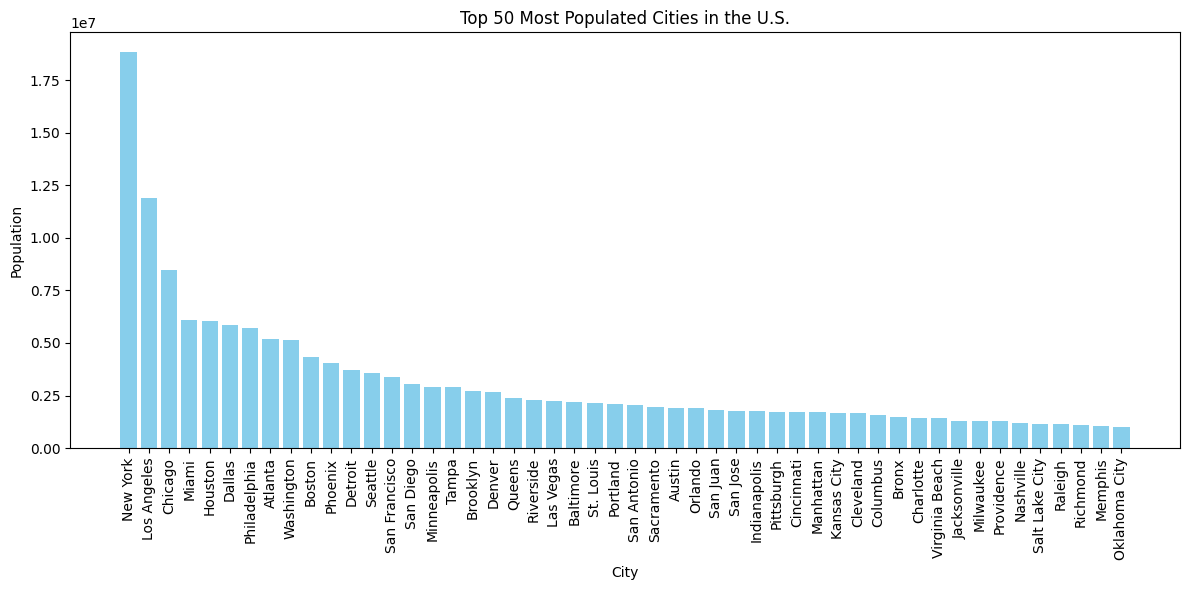

In [29]:
# top N most populated cities

def plot_top_cities_by_population(df, top_n=50):
    """
    Plots a bar chart of the top N most populated cities in the United States.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing at least two columns: 'city' and 'population'.
    - top_n (int): Number of top cities to display in the chart (default is 50).

    Returns:
    - None. Displays the bar chart.
    """
    # Sort the DataFrame by population in descending order
    df_sorted = df.sort_values(by='population', ascending=False)

    # Select top N cities
    df_top = df_sorted.head(top_n)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(df_top['city'], df_top['population'], color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f"Top {top_n} Most Populated Cities in the U.S.")
    plt.ylabel("Population")
    plt.xlabel("City")
    plt.tight_layout()
    plt.show()

plot_top_cities_by_population(df_us, top_n=50)


In [30]:
# Generates distribution points around cities based on population

def generate_distribution_points(df, percentile=0.9, seed=42):
    """
    Generates distribution points around cities based on population.
    Larger cities (above a given percentile threshold) will have more points.

    Parameters:
    - df (pd.DataFrame): DataFrame with at least the following columns:
      'city', 'state_id', 'population', 'lat', 'lng'.
    - percentile (float): Percentile threshold to determine large cities (default is 0.9).
    - seed (int): Random seed for reproducibility (default is 42).

    Returns:
    - List[dict]: A list of dictionaries containing distribution point data.
    """
    # Set random seeds
    random.seed(seed)
    np.random.seed(seed)

    # Calculate threshold for large cities
    threshold = df['population'].quantile(percentile)
    print(f"Large city threshold (percentile {percentile*100:.0f}): {threshold:.0f} inhabitants")

    distribution_points = []

    for _, row in df.iterrows():
        lat = row['lat']
        lng = row['lng']
        city = row['city']
        state = row['state_id']
        population = row['population']

        # Determine number of points based on population
        if population >= threshold:
            n_points = random.randint(7, 10)
        else:
            n_points = random.randint(1, 6)

        # Generate points with small geographic variation
        for _ in range(n_points):
            offset_lat = np.random.uniform(-0.05, 0.05)
            offset_lng = np.random.uniform(-0.05, 0.05)

            distribution_points.append({
                'city': city,
                'state': state,
                'population': population,
                'city_lat': lat,
                'city_lng': lng,
                'dist_lat': lat + offset_lat,
                'dist_lng': lng + offset_lng
            })

    return distribution_points

distribution_points = generate_distribution_points(df_us)

Large city threshold (percentile 90): 13853 inhabitants


In [31]:
# Convert to DataFrame
df_distribution = pd.DataFrame(distribution_points)
print(f"Total de puntos de distribución generados: {len(df_distribution)}")

Total de puntos de distribución generados: 124938


In [32]:
# Save to CSV
df_distribution.to_csv("distribution_points.csv", index=False)

In [34]:
# Preview
df_distribution.head(10)

,city,state,population,city_lat,city_lng,dist_lat,dist_lng
0,New York,NY,18832416,40.6943,-73.9249,40.681754,-73.879829
1,New York,NY,18832416,40.6943,-73.9249,40.717499,-73.915034
2,New York,NY,18832416,40.6943,-73.9249,40.659902,-73.959301
3,New York,NY,18832416,40.6943,-73.9249,40.650108,-73.888282
4,New York,NY,18832416,40.6943,-73.9249,40.704412,-73.904093
5,New York,NY,18832416,40.6943,-73.9249,40.646358,-73.877909
6,New York,NY,18832416,40.6943,-73.9249,40.727544,-73.953666
7,Los Angeles,CA,11885717,34.1141,-118.4068,34.082282,-118.438460
8,Los Angeles,CA,11885717,34.1141,-118.4068,34.094524,-118.404324
9,Los Angeles,CA,11885717,34.1141,-118.4068,34.107295,-118.427677


In [39]:
# Map

def create_distribution_map(df_distribution, sample_size=500, zoom_start=4):
    """
    Creates a folium map centered on the U.S. with distribution points.

    Parameters:
    - df_distribution (DataFrame): DataFrame with 'dist_lat' and 'dist_lng' columns.
    - sample_size (int): Number of points to sample for visualization.
    - zoom_start (int): Initial zoom level of the map.

    Returns:
    - folium.Map object with the plotted sample points.
    """
    # Create the base map
    m = folium.Map(location=[39.8283, -98.5795], zoom_start=zoom_start)

    # Sample the data to avoid overloading the map
    df_sample = df_distribution.sample(min(sample_size, len(df_distribution)))

    # Add CircleMarker for each point
    for _, row in df_sample.iterrows():
        folium.CircleMarker(
            location=[row['dist_lat'], row['dist_lng']],
            radius=2,
            color='blue',
            fill=True,
            fill_opacity=0.5
        ).add_to(m)

    return m

# call
create_distribution_map(df_distribution)


### **B.3)** Asigne una distribución aleatoria multimodal sobre los centros de carga, donde cada centro tendrá asignada una cantidad de cargas determinadas en un periodo de tiempo particular.

In [40]:
# Assign distribution

def assign_distribution_loads(df_distribution, period_label='April 2025'):
    """
    Assigns random loads to distribution points and simulates a time period.

    Parameters:
    - df_distribution (DataFrame): DataFrame with distribution points.
    - period_label (str): Label for the time period (e.g., 'April 2025').

    Returns:
    - DataFrame with additional columns: 'assigned_loads' and 'period'.
    """
    def generate_load():
        rnd = np.random.rand()
        if rnd < 0.7:
            return np.random.randint(0, 51)      # 70% of points: 0–50 loads
        elif rnd < 0.9:
            return np.random.randint(51, 201)    # 20% of points: 51–200 loads
        else:
            return np.random.randint(201, 1001)  # 10% of points: 201–1000 loads

    df_distribution = df_distribution.copy()
    df_distribution['assigned_loads'] = df_distribution.apply(lambda x: generate_load(), axis=1)
    df_distribution['period'] = period_label

    return df_distribution

df_distribution = assign_distribution_loads(df_distribution)
df_distribution[['city', 'state', 'dist_lat', 'dist_lng', 'assigned_loads']].head(10)


,city,state,dist_lat,dist_lng,assigned_loads
0,New York,NY,40.681754,-73.879829,161
1,New York,NY,40.717499,-73.915034,4
2,New York,NY,40.659902,-73.959301,41
3,New York,NY,40.650108,-73.888282,36
4,New York,NY,40.704412,-73.904093,34
5,New York,NY,40.646358,-73.877909,5
6,New York,NY,40.727544,-73.953666,19
7,Los Angeles,CA,34.082282,-118.438460,38
8,Los Angeles,CA,34.094524,-118.404324,6
9,Los Angeles,CA,34.107295,-118.427677,33


### **B.4)** Use un estimador de densidad de Kernel y un ancho de banda adecuado para visualizar la distribución de las cargas en el país

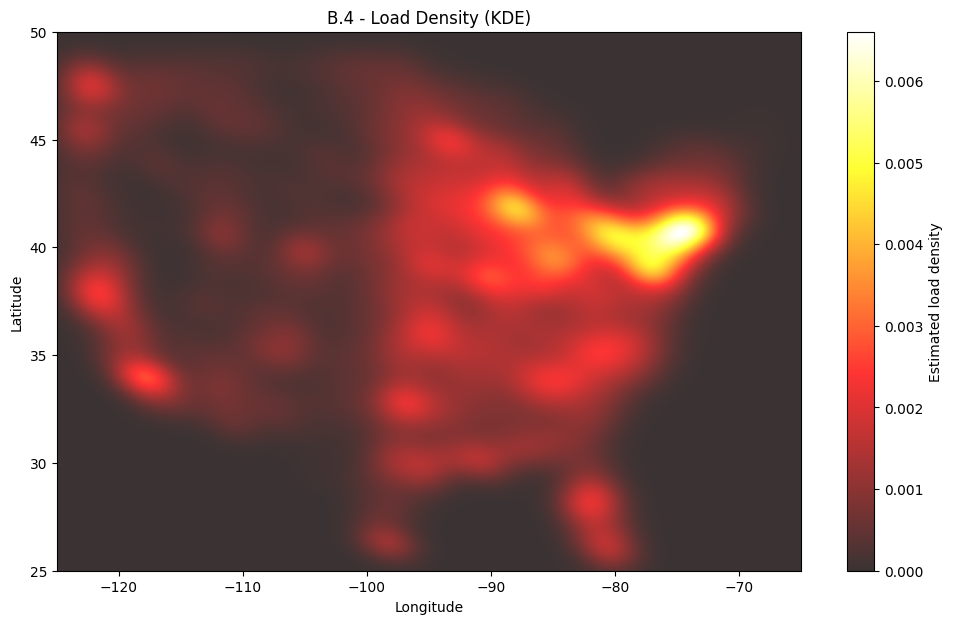

In [43]:
# Plot load density kde(

def plot_load_density_kde(df_distribution, bandwidth=0.1):
    """
    Visualizes the distribution of assigned loads across the U.S. using Kernel Density Estimation.

    Parameters:
    - df_distribution (DataFrame): DataFrame with distribution points and assigned loads.
    - bandwidth (float): Bandwidth for KDE smoothing. Default is 0.1.
    """

    # Extract coordinates and weights
    coords = df_distribution[['dist_lng', 'dist_lat']].values.T
    weights = df_distribution['assigned_loads'].values

    # KDE with weights
    kde = gaussian_kde(coords, weights=weights, bw_method=bandwidth)

    # Define grid over the U.S.
    lng_grid = np.linspace(-125, -65, 500)
    lat_grid = np.linspace(25, 50, 500)
    lng_mesh, lat_mesh = np.meshgrid(lng_grid, lat_grid)
    grid_coords = np.vstack([lng_mesh.ravel(), lat_mesh.ravel()])

    # Evaluate KDE on the grid
    densities = kde(grid_coords).reshape(lng_mesh.shape)

    # Plotting
    plt.figure(figsize=(12, 7))
    plt.imshow(
        densities,
        origin='lower',
        aspect='auto',
        extent=[-125, -65, 25, 50],
        cmap='hot',
        alpha=0.8
    )
    plt.colorbar(label='Estimated load density')
    plt.title('B.4 - Load Density (KDE)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(False)
    plt.show()

plot_load_density_kde(df_distribution, bandwidth=0.1)

### **B.5)** Determine un nivel adecuado del KDE modo de clusterizar espacialmente los centros de cargas. Si es posible, contrastar contra un método de clustering por densidad y analizar diferencias entre ambos métodos ¿Qué puede decir sobre la distribución de la demanda de cargas en EEUU, suponiendo que estos datos son reales?

DBSCAN detected 21 clusters.


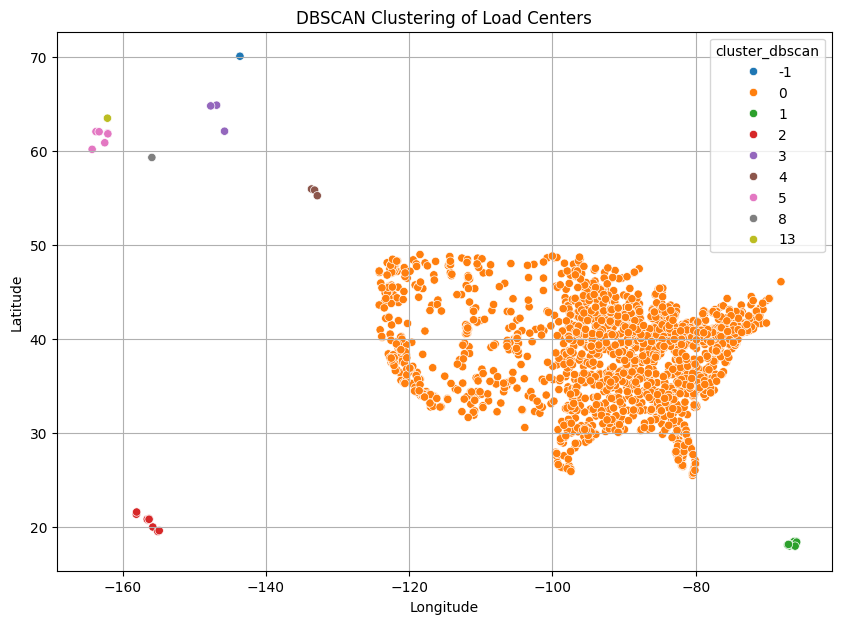

In [44]:
def plot_dbscan_clusters(df_distribution, eps=0.1, min_samples=10, sample_size=2000):
    """
    Apply DBSCAN clustering to distribution center coordinates and plot the results.

    Parameters:
        df_distribution (DataFrame): DataFrame containing 'dist_lat' and 'dist_lng' columns.
        eps (float): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.
        sample_size (int): Number of points to plot for clarity.

    Returns:
        DataFrame: Updated DataFrame with a 'cluster_dbscan' column.
    """
    # Coordinates
    coords = df_distribution[['dist_lat', 'dist_lng']].values

    # Standardize
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    # DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(coords_scaled)
    df_distribution['cluster_dbscan'] = db.labels_

    # Number of clusters (excluding noise)
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    print(f"DBSCAN detected {n_clusters} clusters.")

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=df_distribution.sample(min(sample_size, len(df_distribution))),
        x='dist_lng', y='dist_lat',
        hue='cluster_dbscan',
        palette='tab10',
        legend='full'
    )
    plt.title("DBSCAN Clustering of Load Centers")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

    return df_distribution

df_distribution = plot_dbscan_clusters(df_distribution)

## **Parte C: Preguntas y respuestas rápidas**

### **C1)** Si al normalizar una variable por MinMax se obtiene que el máximo no es 1, ¿qué pudo haber sucedido y cómo resolver el problema?

### **C2)** ¿En qué casos puede pasar que una función objetivo de un problema de optimización sea una función constante?

### **C3)** Si una distribución de una variable está muy sesgada a la izquierda,¿cómo calcular sus outliers?¿Qué pasa si la variable toma valores negativos?

### **C4)** ¿Cómo afecta el escalamiento de variables a los métodos basados en distancia, como K-means o KNN?¿Qué alternativas de escalamiento serían adecuadas si la distribución de las variables es muy diferente?

### **C5)** Una variable tiene muchos ceros y algunos valores altos dispersos.¿Qué técnicas de transformación aplicarías para mejorar su representación y uso en un modelo predictivo?